### Insights on in-game purchases from transactional data from 110+ players
- Small sample size as expected due to protection of sales data.
- Data only include players who have made at least one purchase in the game.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/transactions.csv')
event = pd.read_csv('datasets/events.csv')
bundle = pd.read_csv('datasets/bundle.csv')

In [3]:
df

,unique_id,date,year,time,payment_method,amount,bought_points,country,data_obtained,acct_total,first_purchase,item_bought
0,1,Jun-04,2020,12:21 PM,Credit/Debit card-A,12.98,975,Singapore,100.00%,310.74,1.0,NaN
1,1,Jun-04,2020,12:22 PM,Credit/Debit card-A,6.98,500,Singapore,NaN,NaN,NaN,NaN
2,1,Jul-24,2020,5:48 PM,codapay-grabpay-sgp,25.98,1975,Singapore,NaN,NaN,NaN,NaN
3,1,Jul-30,2020,5:38 PM,codapay-grabpay-sgp,25.98,1975,Singapore,NaN,NaN,NaN,NaN
4,1,Oct-04,2020,3:45 PM,codapay-grabpay-sgp,25.98,1975,Singapore,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,119,Mar-03,2021,6:42 pm,codashop,200.00,7000,Malaysia,NaN,NaN,NaN,NaN
1037,119,Mar-18,2021,7:49 pm,Credit/Debit card,12.90,375,Malaysia,NaN,NaN,NaN,NaN
1038,119,Aug-26,2021,4:37 pm,codapay-touchngo,104.90,3400,Malaysia,NaN,NaN,NaN,NaN
1039,119,Oct-27,2021,12:30 pm,codapay-touchngo,59.90,1900,Malaysia,NaN,NaN,NaN,NaN


In [4]:
df['datetime'] = pd.to_datetime(df.year.astype(str) + '/' + df.date.astype(str))

In [5]:
df['first_purchase'] = df['first_purchase'].fillna(0)

In [6]:
# event

In [7]:
# bundle

### Let's explore any trends in the magnitude of points purchases per transaction
- we use points and not currency to ensure we are comparing at the same base currency

<AxesSubplot:title={'center':'Distribution of variable: bought_points'}, xlabel='bought_points', ylabel='count'>

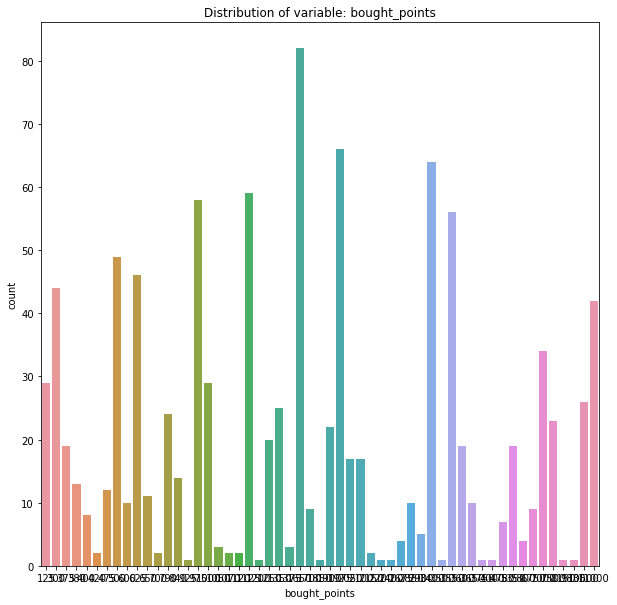

In [8]:
var = 'bought_points'
plt.figure(figsize=(10,10))
plt.title('Distribution of variable: ' + var)
sns.countplot(x=df[var])

Some hints of a normal distribution, but since different regions have varying points, let's create bins to get a clearer picture

Text(0.5, 1.0, 'Distribution of numerical variable: bought_points')

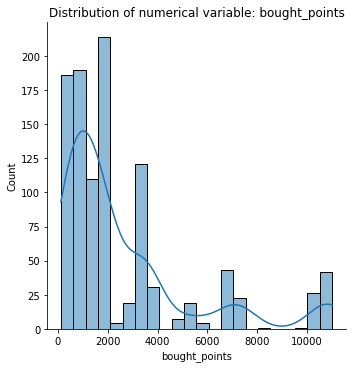

In [9]:
### Points Bundle Sales Distribution
var = 'bought_points'
sns.displot(x=df[var], height = 5, kde=True)
plt.title('Distribution of numerical variable: ' + var)

Curated plot shows a different picture.
- Majority of purchases are closer to 0
- Higher frequency of small purchases
- Suggests that players typically purchase the battle pass or specific guns 
- However, assumption is price per point is lower at 'bulk purchases' and players do not buy multiple smaller bundles to accumulate points

We will further explore this theory by taking a look at random users

In [10]:
df.loc[df.unique_id == 77]

,unique_id,date,year,time,payment_method,amount,bought_points,country,data_obtained,acct_total,first_purchase,item_bought,datetime
590,77,Feb-20,2021,9:04 PM,Credit/Debit card-A,2490.0,7500,Philippines,38.69%,61143,1.0,NaN,2021-02-20
591,77,Mar-03,2021,11:00 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-03-03
592,77,Mar-19,2021,11:34 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-03-19
593,77,Mar-25,2021,11:20 AM,GCash,249.0,650,Philippines,NaN,NaN,0.0,NaN,2021-03-25
594,77,Apr-02,2021,10:50 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-04-02
595,77,Apr-14,2021,11:49 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-04-14
596,77,Apr-14,2021,11:51 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-04-14
597,77,May-17,2021,10:01 PM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-05-17
598,77,May-27,2021,9:21 AM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-05-27
599,77,Jun-10,2021,5:41 PM,Credit/Debit card-A,2490.0,7500,Philippines,NaN,NaN,0.0,NaN,2021-06-10


In [11]:
df.loc[df.unique_id == 88]

,unique_id,date,year,time,payment_method,amount,bought_points,country,data_obtained,acct_total,first_purchase,item_bought,datetime
665,88,Aug-22,2020,12:37 AM,codapay-grabpay-sgp,25.98,1975,Singapore,71.70%,370.72,1.0,NaN,2020-08-22
666,88,Aug-22,2020,12:26 PM,codapay-grabpay-sgp,12.98,975,Singapore,NaN,NaN,0.0,NaN,2020-08-22
667,88,Aug-29,2020,1:23 PM,codapay-grabpay-sgp,25.98,1975,Singapore,NaN,NaN,0.0,NaN,2020-08-29
668,88,Sep-05,2020,12:50 PM,codapay-grabpay-sgp,6.98,500,Singapore,NaN,NaN,0.0,NaN,2020-09-05
669,88,Sep-24,2020,11:13 PM,codapay-grabpay-sgp,12.98,975,Singapore,NaN,NaN,0.0,NaN,2020-09-24
670,88,Oct-14,2020,10:31 AM,codapay-grabpay-sgp,128.98,10500,Singapore,NaN,NaN,0.0,NaN,2020-10-14
671,88,Nov-04,2020,3:50 PM,codapay-grabpay-sgp,12.98,975,Singapore,NaN,NaN,0.0,NaN,2020-11-04
672,88,Mar-03,2021,5:40 PM,Credit/Debit card-A,12.98,975,Singapore,NaN,NaN,0.0,NaN,2021-03-03
673,88,Apr-13,2021,3:45 PM,Credit/Debit card-A,25.98,1975,Singapore,NaN,NaN,0.0,NaN,2021-04-13


In [12]:
df.loc[df.unique_id == 99]

,unique_id,date,year,time,payment_method,amount,bought_points,country,data_obtained,acct_total,first_purchase,item_bought,datetime
829,99,Jul-07,2022,3:59 PM,payon-primeiro-boleto,39.9,1120,Brazil,NaN,NaN,1.0,NaN,2022-07-07
830,99,Jul-12,2022,2:39 PM,payon-primeiro-boleto,349.9,9830,Brazil,NaN,NaN,0.0,NaN,2022-07-12
831,99,Aug-10,2022,9:20 PM,payon-primeiro-boleto,169.9,4780,Brazil,NaN,NaN,0.0,NaN,2022-08-10
832,99,Aug-10,2022,9:22 PM,payon-primeiro-boleto,39.9,1120,Brazil,NaN,NaN,0.0,NaN,2022-08-10


Assumption does not hold true, it is not uncommon for users to make multiple smaller purchases in the same session. \
Rows:
- 595 to 596
- 665 to 666
- 831 to 832

How common is this occurence exactly and is it significant? \
Let's see how many repeated transactions happen for an unique user in a same day.

In [13]:
df2 = df.groupby(['unique_id', 'date', 'year']).filter(lambda g: len(g) > 1)
df2

,unique_id,date,year,time,payment_method,amount,bought_points,country,data_obtained,acct_total,first_purchase,item_bought,datetime
0,1,Jun-04,2020,12:21 PM,Credit/Debit card-A,12.98,975,Singapore,100.00%,310.74,1.0,NaN,2020-06-04
1,1,Jun-04,2020,12:22 PM,Credit/Debit card-A,6.98,500,Singapore,NaN,NaN,0.0,NaN,2020-06-04
13,2,Jul-06,2020,8:49 PM,Credit/Debit card-A,6.98,500,Singapore,100.00%,496.64,1.0,NaN,2020-07-06
14,2,Jul-06,2020,8:50 PM,Credit/Debit card-A,6.98,500,Singapore,NaN,NaN,0.0,NaN,2020-07-06
15,2,Aug-05,2020,6:44 PM,Credit/Debit card-A,6.98,500,Singapore,NaN,NaN,0.0,NaN,2020-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,117,Apr-29,2021,10:43 pm,codashop,50.00,125,Philippines,NaN,NaN,0.0,NaN,2021-04-29
1018,117,Apr-29,2021,10:43 pm,codashop,50.00,125,Philippines,NaN,NaN,0.0,NaN,2021-04-29
1029,118,Feb-05,2021,12:31 pm,codapay-touchngo,199.90,6750,Malaysia,NaN,NaN,0.0,NaN,2021-02-05
1030,118,Feb-05,2021,12:37 pm,codapay-touchngo,39.90,1250,Malaysia,NaN,NaN,0.0,NaN,2021-02-05


**Takeaway** 
- Multiple transactions within a day are extremely common.
- Over 40% (439 out of 1041) of our dataset are part of multiple transactions in a day.

**Possible reasons**

Game-specific
- Including different points bundle to reach a specific amount of desired points
- Weapon bundle CTA with displayed discount lead to additional purchase (for entire bundle)

General
- Overcame initial purchase inertia 

### Let's combine transactions within the same day and see if it pants a different picture

In [14]:
df3 = df.groupby(['unique_id', 'datetime'], as_index= False)['bought_points'].sum()

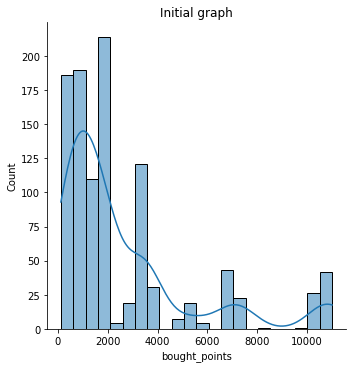

<Figure size 1008x1008 with 0 Axes>

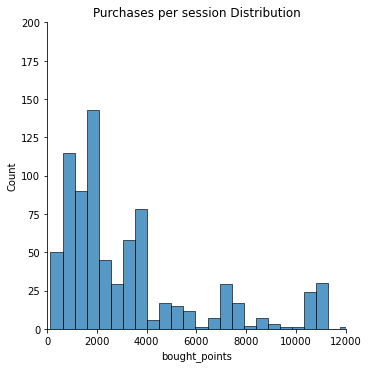

In [15]:
# replot previous graph for comparison
var = 'bought_points'
sns.displot(x=df[var], height = 5, kde=True)
plt.title('Initial graph')

# Visualise our transformed variable - bought_points
plt.figure(figsize=[14,14])
custom_bins = 45
sns.displot(df3['bought_points'], bins = custom_bins)
plt.title('Purchases per session Distribution')
# we retain the axis limits to better visualise the changes
plt.xlim(0, 12000)
plt.ylim(0, 200)
plt.show()

We see a slight increase in the count of total purchases between 2000 to 6000

**Recommendation:** If the goal is to maximise revenue, there may be a potential to engage in more aggressive pricing for smaller points bundle.

In [16]:
event.head()

,Episode Name,Episode,Act,Type,Start
0,Episode 01: IGNITION,1,1,Normal,June 2nd 2020
1,Episode 01: IGNITION,1,2,Normal,August 4th 2020
2,Episode 01: IGNITION,1,3,Normal,October 13th 2020
3,Episode 02: FORMATION,2,1,Normal,January 12th 2021
4,Episode 02: FORMATION,2,2,Normal,March 2nd 2021


In [17]:
bundle.head()

,contains,edition,collection,price,patch,repeat,release_date
0,"Melee, Phantom",Limited,Champions 2022,6167,5.04,0,"Aug 23, 2022"
1,"Melee, Ghost, Spectre, Phantom, Odin",Premium,"Reaver, EP 5",7100,5.03,0,"Aug 10, 2022"
2,"Classic, Operator, Stinger, Phantom, Bucky",Premium,Run It Back 3 Bundle,5950,5.01,1,"Jul 27, 2022"
3,"Frenzy, Vandal, Phantom, Spectre, Melee",Deluxe,Sarmad,5100,5.01,0,"July 14, 2022"
4,"Melee, Vandal, Operator, Shorty, Stinger",Exclusive,Prelude to Chaos,8700,5.00,0,"June 22, 2022"


In [18]:
### convert date columns to date
event.Start=pd.to_datetime(event.Start)
bundle.release_date=pd.to_datetime(bundle.release_date)

In [19]:
### add end date by taking next act's start date - 1
for i in range(len(event)):
    try:
        event.at[event.index[i], 'End'] = event.loc[i+1]['Start'] - pd.DateOffset(days=1)
    except:
        pass

### manually add end date of last act due to lack of info
event.at[event.index[13], 'End'] = pd.to_datetime('Oct 18, 2022')

In [20]:
event

,Episode Name,Episode,Act,Type,Start,End
0,Episode 01: IGNITION,1,1,Normal,2020-06-02,2020-08-03
1,Episode 01: IGNITION,1,2,Normal,2020-08-04,2020-10-12
2,Episode 01: IGNITION,1,3,Normal,2020-10-13,2021-01-11
3,Episode 02: FORMATION,2,1,Normal,2021-01-12,2021-03-01
4,Episode 02: FORMATION,2,2,Normal,2021-03-02,2021-04-26
5,Episode 02: FORMATION,2,3,Normal,2021-04-27,2021-06-21
6,Episode 03: REFLECTION,3,1,YR 1 Anniversary,2021-06-22,2021-09-07
7,Episode 03: REFLECTION,3,2,Normal,2021-09-08,2021-11-01
8,Episode 03: REFLECTION,3,3,RiotX Arcane,2021-11-02,2022-01-31
9,Episode 04: DISRUPTION,4,1,Lunar Celebration Event,2022-02-01,2022-02-28


In [21]:
### assign episode and act information to transactions
for i in range(len(event)):
    start = event.loc[i]['Start']
    end = event.loc[i]['End']
    episode = event.loc[i]['Episode']
    act = event.loc[i]['Act']
    for i in range(len(df3)):
        if (start <= df3.loc[i]['datetime'] <= end):
            df3.at[df3.index[i], 'days_since'] = (df3.loc[i]['datetime'] - start)
            df3.at[df3.index[i], 'episode'] = episode
            df3.at[df3.index[i], 'act'] = act   

In [22]:
df3

,unique_id,datetime,bought_points,days_since,episode,act
0,1,2020-06-04,1475,2 days,1.0,1.0
1,1,2020-07-24,1975,52 days,1.0,1.0
2,1,2020-07-30,1975,58 days,1.0,1.0
3,1,2020-10-04,1975,61 days,1.0,2.0
4,1,2021-07-22,975,30 days,3.0,1.0
...,...,...,...,...,...,...
789,119,2021-03-03,7000,1 days,2.0,2.0
790,119,2021-03-18,375,16 days,2.0,2.0
791,119,2021-08-26,3400,65 days,3.0,1.0
792,119,2021-10-27,1900,49 days,3.0,2.0


### Season/battle pass Analysis

We create a feature days_since that reflect the number of days that pass since the start of a new season where a battle pass is launched.
- There may be slight variation in dates as data from transactions is not limited to a region with identical/similar timezones
- Data in transactions are based on individual users but data from events are tied to a specific timezone

In [23]:
df4 = df3.groupby(['days_since'], as_index= False)['bought_points'].sum()

In [24]:
df4

,days_since,bought_points
0,0 days,182410
1,1 days,187525
2,2 days,52315
3,3 days,27420
4,4 days,54630
...,...,...
82,85 days,4325
83,87 days,9400
84,88 days,4950
85,89 days,10500


<AxesSubplot:xlabel='days_since'>

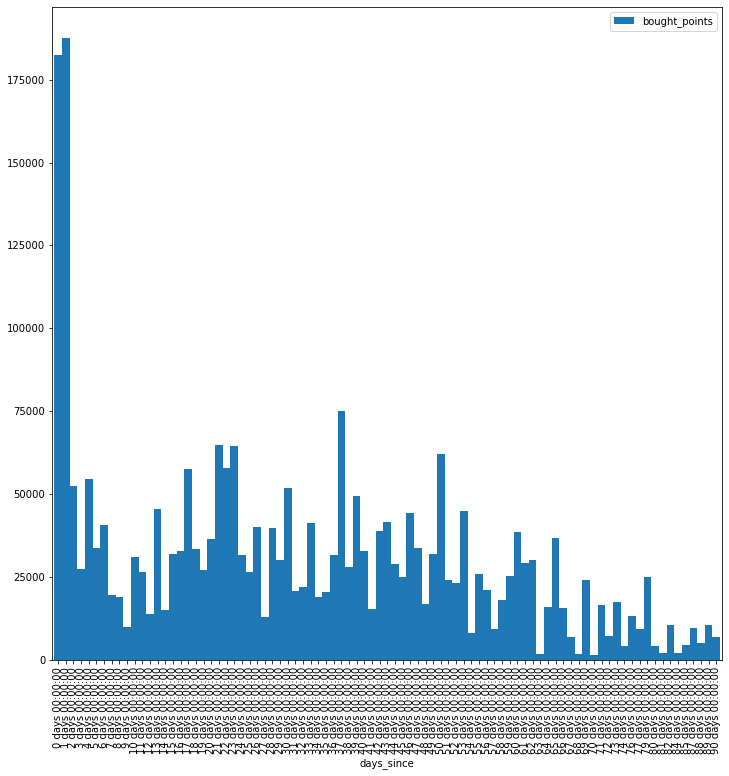

In [25]:
df4.plot.bar(x='days_since', y='bought_points', width = 1, figsize = (12,12))

In [26]:
(df4['bought_points'][0] + df4['bought_points'][1]) / df4['bought_points'].sum()

0.14120060688760175

Sales from the first two days of the battle pass launched comprised of **14.12%** of total transactions in its 90 days period.
- For perspective: 1 out of 90 is 1.12%

**Check the number of transactions to ensure above analysis was not subjected to any anomalies**

In [27]:
df4 = df3.groupby(['days_since'], as_index= False)['bought_points'].count()

<AxesSubplot:xlabel='days_since'>

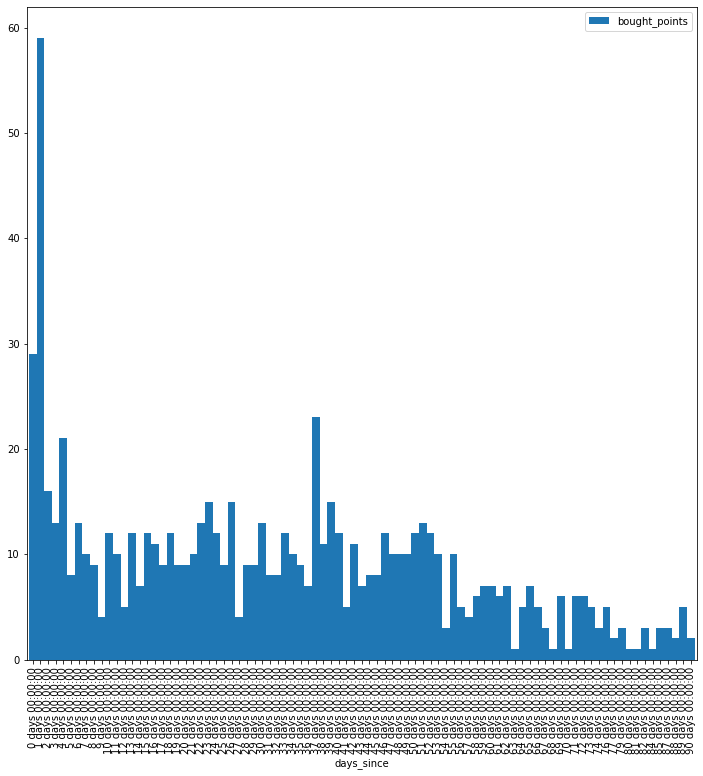

In [28]:
df4.plot.bar(x='days_since', y='bought_points', width = 1, figsize = (12,12))

In [29]:
(df4['bought_points'][0] + df4['bought_points'][1]) / df4['bought_points'].sum()

0.11325611325611326

Number of transactions from the first two days of the battle pass launched comprised of **11.33%** of total transactions in its 90 days period. Previous analysis is reliable with information at hand.
- For perspective: 1 out of 90 is 1.12%

**Recommendation:** Depending on industry benchmarks, larger incentives to purchase a battle pass early could be introduced to entice and drive an increase in sales.

### Weapon Bundles Analysis
Cavaet: data collected may have biases due to data availability, insights from this portion should not be used conclusively

In [30]:
### add end date to bundles by taking next bundle's start date - 1
for i in range(1, len(bundle)):
    try:
        bundle.at[bundle.index[i], 'end_date'] = bundle.loc[i-1]['release_date'] - pd.DateOffset(days=1)
    except:
        pass

### manually add end date of last act due to lack of info
bundle.at[bundle.index[0], 'end_date'] = pd.to_datetime('Sep 21, 2022')

In [31]:
### assign episode and act information to transactions
for i in range(len(bundle)):
    start = bundle.loc[i]['release_date']
    end = bundle.loc[i]['end_date']
    collection = bundle.loc[i]['collection']
    for i in range(len(df3)):
        if (start <= df3.loc[i]['datetime'] <= end):
            df3.at[df3.index[i], 'collection'] = collection

In [32]:
df4 = df3.groupby(['collection'], as_index= False)['bought_points'].sum()

In [36]:
df4.sort_values(by='bought_points', ascending=False).head(5)

,collection,bought_points
46,Smite,191635
14,Horizon,148925
27,Prime//2.0,109310
9,Forsaken,92500
13,"Glitchpop, EP 2",82645


In [37]:
df4.sort_values(by='bought_points', ascending=True).head(5)

,collection,bought_points
51,Team Ace,1975
21,Neptune,3400
54,Titanmail,4065
43,Sensation,4800
6,Ego,4950


No conclusion can be safely drawn about the most popular bundles due to varying differences in weapon bundles' availability date.

Least popular bundles can be somewhat relied on as there is a minimum period for each bundle

**Recommendation:** Similarities between features and art of least popular bundles can be compared to avoid poor sales of future bundles if relevant. However, I believe the purpose of launching such bundles are used to juxtapose the difference in qualities for a 'good/hyped' bundle that is being planned to release in the future.


If my suspicions are true, the sales of such bundles are not entirely relevant.
- I would recommend staggering good bundles from new season dates as average order value (AOV) suggest a somewhat price-sensitive audience and a simultaneous purchase of a battle pass and a weapon bundle may reduce the average customer value(ACV).